# Project 1: Gradient-based Algorithms and Differentiable Programming


## 1. Introduction
Consider a simple formulation of rocket landing where the rocket state $x(t)$ is represented by its distance to the ground $d(t)$ and its velocity $v(t)$, i.e., $x(t) = [d(t), v(t)]^T$, where $t$ specifies time. The control input of the rocket is its acceleration $a(t)$. The discrete-time dynamics follows 

$$
\begin{aligned}
d(t+1) = d(t) + v(t) \Delta t, \\
v(t+1) = v(t) + a(t) \Delta t,
\end{aligned}
$$

where $\Delta t$ is a time interval. Further, let the closed-loop controller be 

$$
a(t) = f_{\theta}(x(t))
$$

where $f_{\theta}(\cdot)$ is a neural network with parameters $\theta$, which are to be determined through optimization.

For each time step, we assign a loss as a function of the control input and the state: $l(x(t),a(t))$. In this example, we will simply set $l(x(t),a(t))=0$ for all $t=1,...,T-1$, where $T$ is the final time step, and $l(x(T),a(T)) = ||x(T)||^2 = d(T)^2 + v(T)^2$. This loss encourages the rocket to reach $d(T)=0$ and $v(T)=0$, which are proper landing conditions.

The optimization problem is now formulated as

$$
\begin{aligned}
\min_{\theta} \quad & ||x(T)||^2 \\
\quad & d(t+1) = d(t) + v(t) \Delta t, \\
\quad & v(t+1) = v(t) + a(t) \Delta t, \\
\quad & a(t) = f_{\theta}(x(t)), ~\forall t=1,...,T-1
\end{aligned}
$$

While this problem is constrained, it is easy to see that the objective function can be expressed as a function of $x(T-1) and a(T-1)$, where $x(T-1)$ as a function of $x(T-2)$ and $a(T-2)$, and so on. Thus it is essentially an unconstrained problem with respect to $\theta$. 

In the following, we code this problem up with [PyTorch](https://pytorch.org/), which allows us to only build the forward pass of the loss (i.e., how we move from $x(1)$ to $x(2)$ and all the way to $x(T)$) and automatically get the gradient $\nabla_{\theta} l(x(T),a(T))$.

## Problem formulation

Objective function:
The objective of this project is to use drag and crosswind as constraint in the rocket landing.

$$
\begin{aligned}
\min_{\theta} \quad & ||x(T)||^2 \\
\quad & d_{y}(t+1) = d_{y}(t) + v_{y}(t) \Delta t, \\
\quad & d_{x}(t+1) = d_{x}(t) + v_{x}(t) \Delta t, \\
\quad & v_{y}(t+1) = v_{y}(t) + a_{y}(t) \Delta t, \\
\quad & v_{x}(t+1) = v_{x}(t) + a_{x}(t) \Delta t, \\
\quad & a_{y}(t+1) = -G_{y} - D_{y}(t) + a_{y}(t) \Delta t,\\
\quad & a_{x}(t+1) = a_{x}(t) \Delta t
\quad & ~\forall t=1,...,T-1
\end{aligned}
$$

Assumptions for calculation of Drag

$$
\begin{aligned} \\
\quad & D = Cd*(A)* 0.5 * Rho * v^2
\end{aligned}
$$

Where: 
$$
\begin{aligned} \\
\quad & Cd = 0.3, \\
\quad & A = 4 m^2, \\
\quad & Rho = 850 Kg/m^3, \\
\quad & v = \Delta State, \\
\quad & m = 50000 Kg
\end{aligned}
$$

Force quilibrium
$$
\begin{aligned} \\
\quad & D_{Deceleration} = 0.00658 * \Delta State^2
\end{aligned}
$$

Net Force
$$
\begin{aligned} \\
\quad & F_{net} = f_{drag} - f_{weight}
\end{aligned}
$$
Where f_{weight} is the force of weight of the rocket = m * g

Problem data

$$
\begin{aligned} \\
\quad & T_{interval} = 0.01 Sec, \\
\quad & G_{acceleration} = 9.81 m/s^2, \\
\quad & Thrust_{acceleration} = 15 m/s^2, \\
\end{aligned}
$$



In [224]:
# overhead

import logging
import math
import random
import numpy as np
import time
import torch as t
import torch.nn as nn
from torch import optim
from torch.nn import utils
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)

In [225]:
# environment parameters

FRAME_TIME = 0.01  # time interval
GRAVITY_ACCEL = 9.81  # gravity constant
BOOST_ACCEL = 15.0  # thrust constant
#drag = 0.5

# # the following parameters are not being used in the sample code
# PLATFORM_WIDTH = 0.25  # landing platform width
# PLATFORM_HEIGHT = 0.06  # landing platform height
# ROTATION_ACCEL = 20  # rotation constant

' \n    Drag calculation\n    D = Cd * A * 0.5 * r * V**2 \n    assume Cd = 0.3\n    A = 4 m**2\n    r = 850 kg/m**3 for steel\n    V = delta_state\n    m = 50000 Kg\n    force equilibrium \n    m * D_decel = D\n    D_decel = 0.00658 * delta_state**2 \n'

In [226]:
# define system dynamics

class Dynamics(nn.Module):

    def __init__(self):
        super(Dynamics, self).__init__()

    @staticmethod
    def forward(state, action):
        """
        action: thrust or no thrust
        state[0] = y
        state[1] = y_dot
        state[2] = x
        state[3] = x_dot
        """

# Initialize a matrix for new delta states
#         delta_state_mat = []
#         for i in range(len(state)):

            #gravity
#             delta_state_gravity = t.tensor([0., GRAVITY_ACCEL*FRAME_TIME, 0., 0.])

            #Drag
#             delta_state_drag = t.tensor([0.,0.,0.,-drag * FRAME_TIME])

            # thrust
#             delta_state_thrust = BOOST_ACCEL * FRAME_TIME * t.tensor([0., 0., 1., 1.]) * t.cat((t.zeros(2), action[i]))


#             delta_state = delta_state_thrust + delta_state_drag + delta_state_gravity
#             delta_state_mat.append(delta_state)
#         delta_state_mat_ten = t.stack(delta_state_mat)

        #Velocity
#         state = state + delta_state_mat_ten

#         gravity
        delta_state_gravity = t.tensor([0., GRAVITY_ACCEL * FRAME_TIME, 0., 0.])
        
        delta_state_y = BOOST_ACCEL * FRAME_TIME * t.tensor([0., -1., 0., 0.]) * action[0]
        
        delta_state_x = BOOST_ACCEL * FRAME_TIME * t.tensor([0., 0., 0., 1.]) * action[1]
        
        temp = delta_state_y
        
#         """ 
#         Drag calculation
#         D = Cd * A * 0.5 * r * V^2 
#         assume Cd = 0.3
#         A = 4 m**2
#         r = 850 kg/m**3 for steel
#         V = delta_state
#         m = 60000 Kg
#         force equilibrium 
#         m * D_decel = D
#         D_decel = 0.00658 * delta_state**2 
#         """
        
        D_decel = 0.00658 * temp * temp
        
        Net_Accel = BOOST_ACCEL - D_decel
        
        delta_state_y = Net_Accel * FRAME_TIME * t.tensor([0., -1., 0., 0.]) * action[0]
        
        state = state + delta_state_y + delta_state_gravity + delta_state_x
        #Position
        step_mat = t.tensor([[1., FRAME_TIME, 0., 0.],
                            [0., 1., 0., 0.],
                            [0., 0., 1., FRAME_TIME],
                            [0., 0., 0., 1.]])

        
        state = t.matmul(step_mat, state)

        return state
#         print(type(state))

In [227]:
# a deterministic controller

class Controller(nn.Module):

    def __init__(self, dim_input, dim_hidden, dim_output):
        """
        dim_input: # of system states
        dim_output: # of actions
        dim_hidden: # up to you
        """
        super(Controller, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(dim_input, dim_hidden),
            nn.Tanh(),
            nn.Tanh(),
            nn.Linear(dim_hidden, dim_hidden),
            nn.Tanh(),
            nn.Linear(dim_hidden, dim_hidden),
            nn.Tanh(),
            nn.Linear(dim_hidden, dim_output),
            nn.Sigmoid()
        )

    def forward(self, state):
        action = self.network(state)
        return action

In [228]:
# the simulator that rolls out x(1), x(2), ..., x(T)

class Simulation(nn.Module):

    def __init__(self, controller, dynamics, T):
        super(Simulation, self).__init__()
        self.state = self.initialize_state()
        self.controller = controller
        self.dynamics = dynamics
        self.T = T
        self.action_trajectory = []
        self.state_trajectory = []

    def forward(self, state):
        self.action_trajectory = []
        self.state_trajectory = []
        for _ in range(T):
            action = self.controller.forward(state)
            state = self.dynamics.forward(state, action)
            self.action_trajectory.append(action)
            self.state_trajectory.append(state)
        return self.error(state)

    @staticmethod
    def initialize_state():
        
        state = [1, 0., 0., 0.]  # TODO: need batch of initial states
        return t.tensor(state, requires_grad=False).float()

    def error(self, state):
        return state[0]**2 + state[1]**2 + state[2]**2 + state[3]**2

In [229]:
# set up the optimizer

# loss = []
lossplt = []
# losspltarr = []
class Optimize:
    def __init__(self, simulation):
        self.simulation = simulation
        self.parameters = simulation.controller.parameters()
        self.optimizer = optim.LBFGS(self.parameters, lr=0.01)

    def step(self):
        def closure():
            loss = self.simulation(self.simulation.state)
            self.optimizer.zero_grad()
            loss.backward() # need to go through this part
#             lossplt.append(loss.backward())
            return loss
#             return lossplt
#         lossplt = []
#         lossplt.append(loss)
        self.optimizer.step(closure) # need to go through this
        return closure()
    
    def train(self, epochs):
        for epoch in range(epochs):
            loss = self.step()
            lossplt.append(loss)
#             losspltarr = lossplt.numpy()
            print('\n Itr:\t',epoch + 1)
            print('loss: %.3f' % (loss))
#             lossplt = []
#             lossplt.append(loss)
            self.visualize()
#         return lossplt()

    def visualize(self):
        data = np.array([self.simulation.state_trajectory[i].detach().numpy() for i in range(self.simulation.T)])
        x = data[:, 0]
        y = data[:, 1]
        a = data[:, 2]
        b = data[:, 3]
        c = data[:, 3]
        d = data[:, 1]
        
        plt.figure()
        plt.subplot(221)
        plt.title('X Plot')
        plt.xlabel('Horizontal Distance')
        plt.ylabel("Horizontal Velocity (Side Thrust)")
        plt.plot(x, y)
        
        plt.subplot(222)
        plt.title('Y Plot')
        plt.xlabel('Vertical Distance')
        plt.ylabel("Vertical Velocity (Thrust)")
        plt.plot(a, b)
        
        plt.subplot(223)
        plt.plot(c, d)
        plt.title('Plot of Side Thrust vs Vertical Thrust')
        plt.xlabel('Side Thrust')
        plt.ylabel("Vertical Thrust")
        plt.tight_layout()
        plt.show()
        

# plt.plot(lossplt)
# plt.show()


 Itr:	 1
loss: 27.224


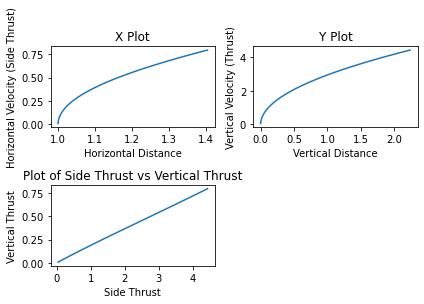


 Itr:	 2
loss: 14.308


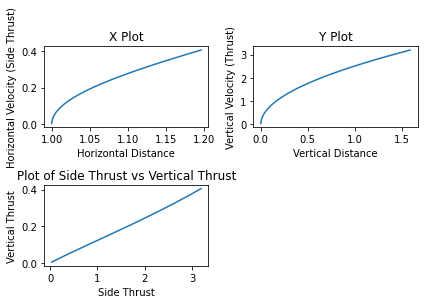


 Itr:	 3
loss: 8.146


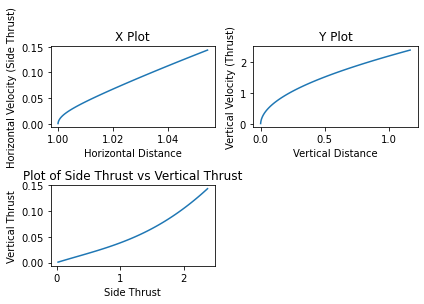


 Itr:	 4
loss: 5.086


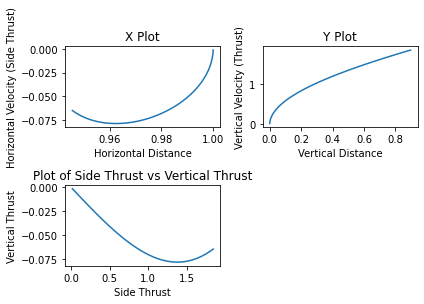


 Itr:	 5
loss: 3.474


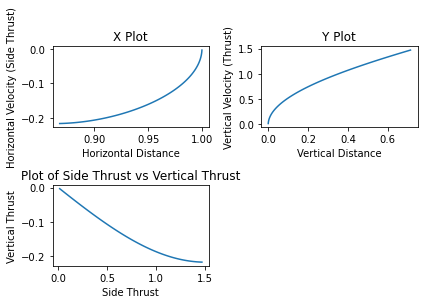


 Itr:	 6
loss: 2.551


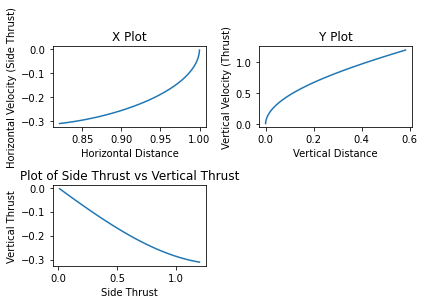


 Itr:	 7
loss: 1.995


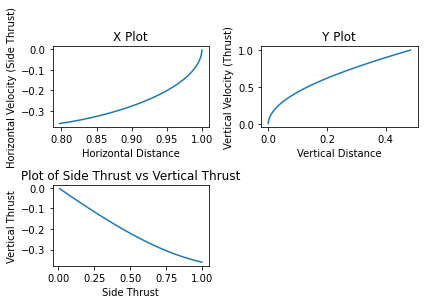


 Itr:	 8
loss: 1.616


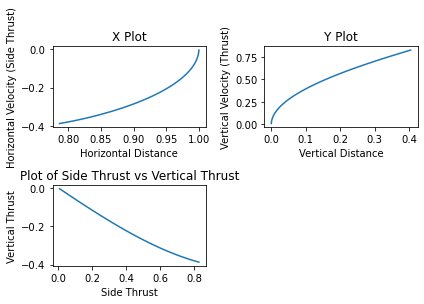


 Itr:	 9
loss: 1.350


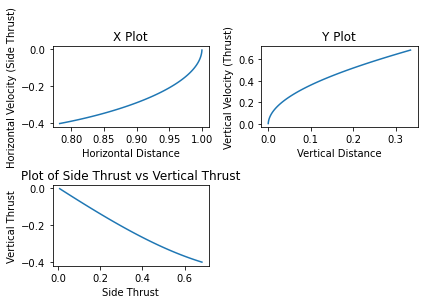


 Itr:	 10
loss: 1.183


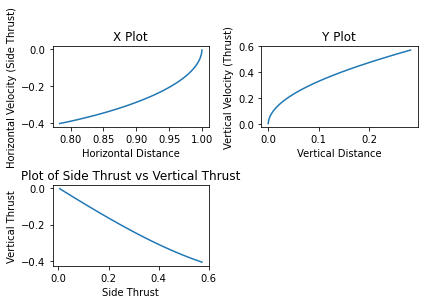


 Itr:	 11
loss: 1.074


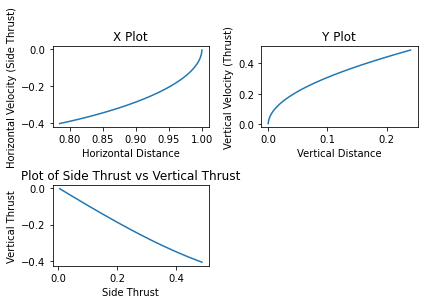


 Itr:	 12
loss: 0.997


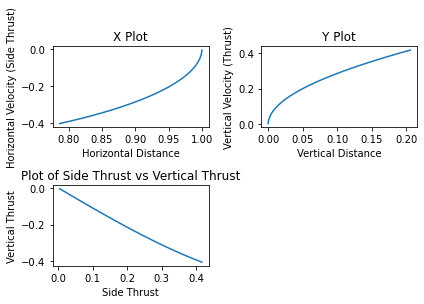


 Itr:	 13
loss: 0.935


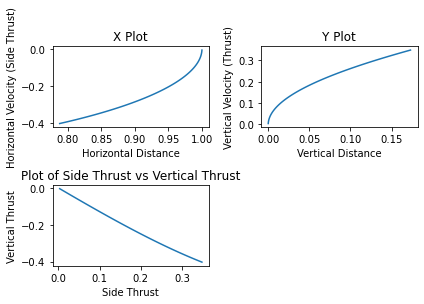


 Itr:	 14
loss: 0.879


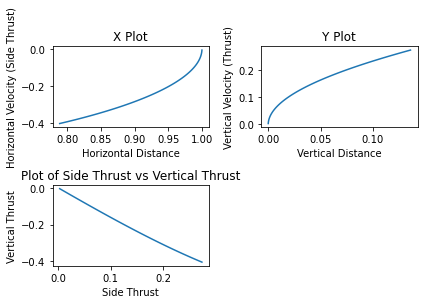


 Itr:	 15
loss: 0.846


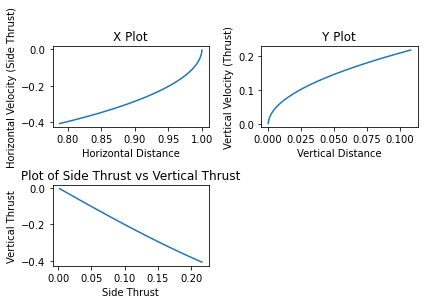


 Itr:	 16
loss: 0.826


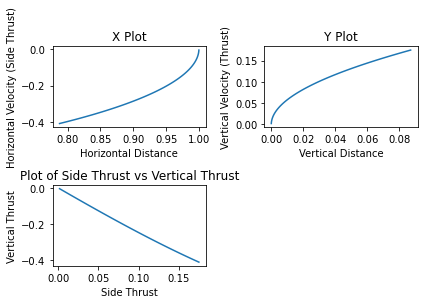


 Itr:	 17
loss: 0.809


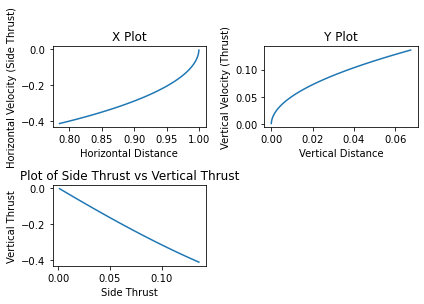


 Itr:	 18
loss: 0.588


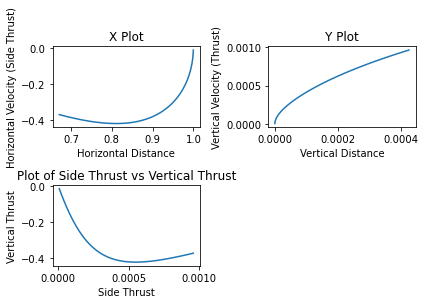


 Itr:	 19
loss: 0.459


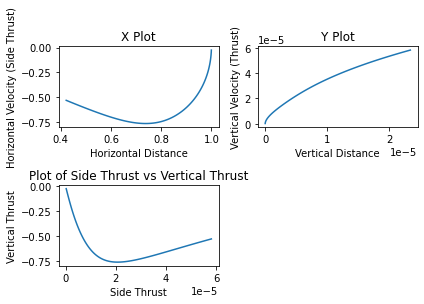


 Itr:	 20
loss: 0.406


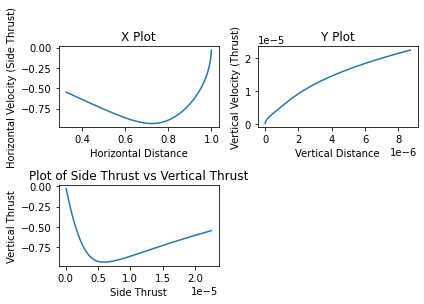


 Itr:	 21
loss: 0.009


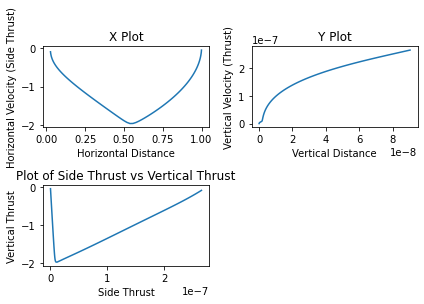


 Itr:	 22
loss: 0.004


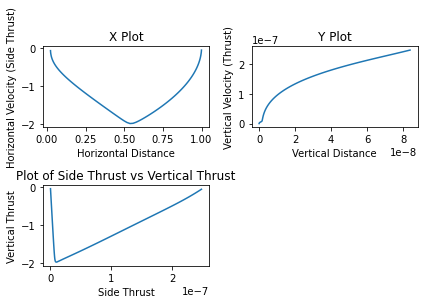


 Itr:	 23
loss: 0.002


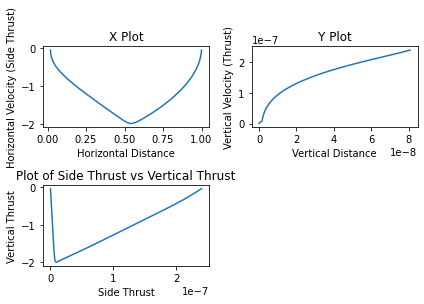


 Itr:	 24
loss: 0.001


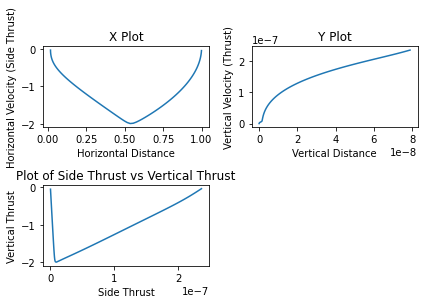


 Itr:	 25
loss: 0.001


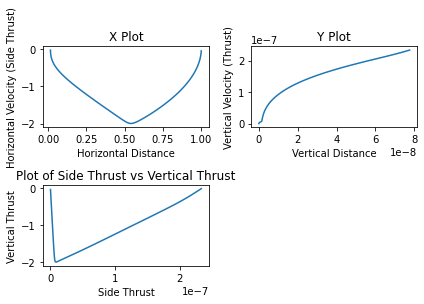


 Itr:	 26
loss: 0.001


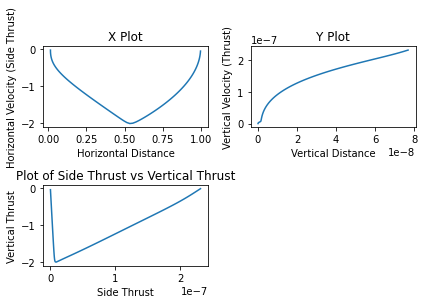


 Itr:	 27
loss: 0.000


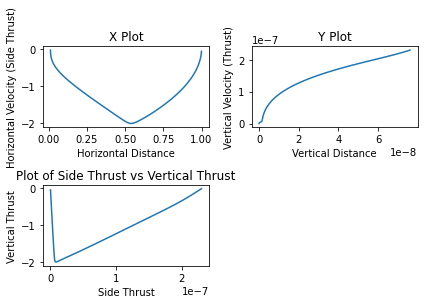


 Itr:	 28
loss: 0.000


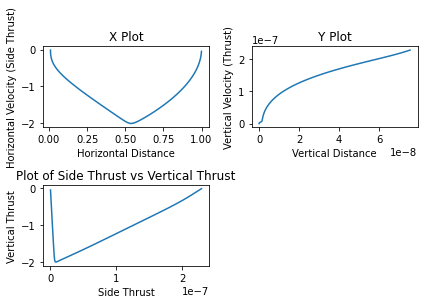


 Itr:	 29
loss: 0.000


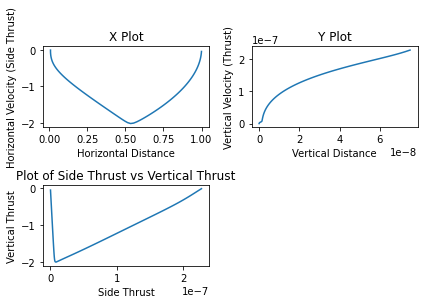


 Itr:	 30
loss: 0.000


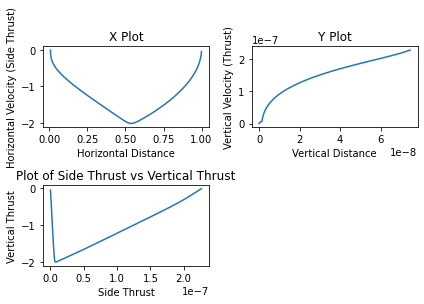


 Itr:	 31
loss: 0.000


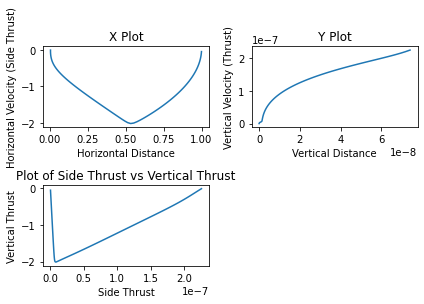


 Itr:	 32
loss: 0.000


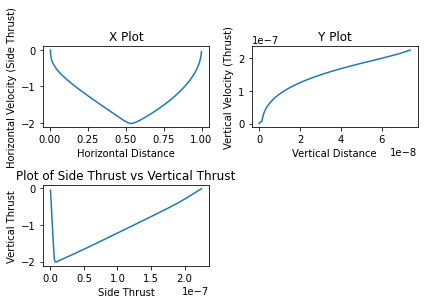


 Itr:	 33
loss: 0.000


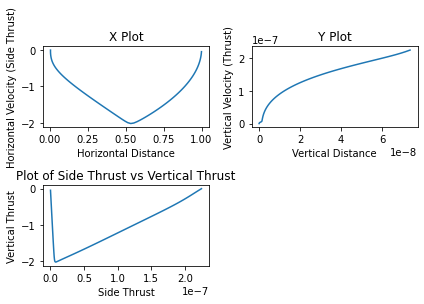


 Itr:	 34
loss: 0.000


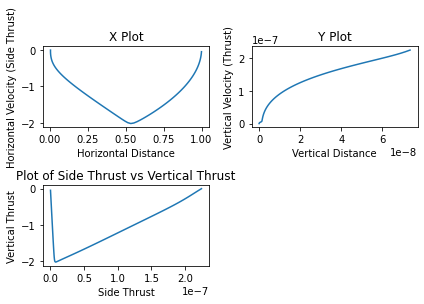


 Itr:	 35
loss: 0.000


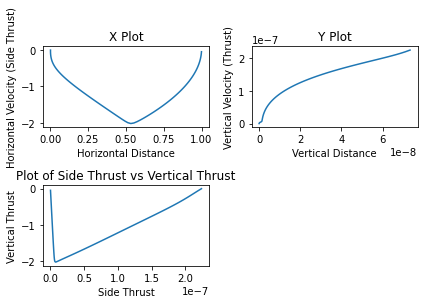


 Itr:	 36
loss: 0.000


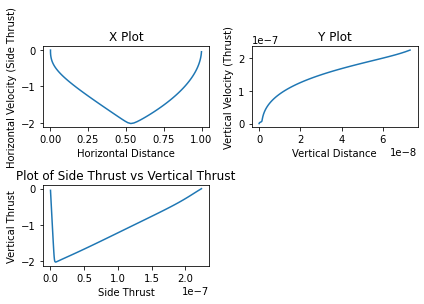


 Itr:	 37
loss: 0.000


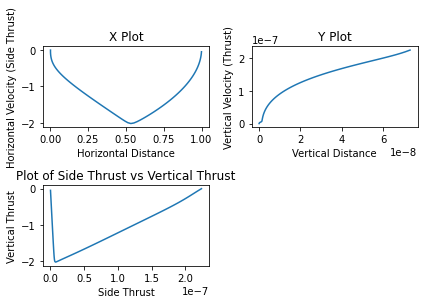


 Itr:	 38
loss: 0.000


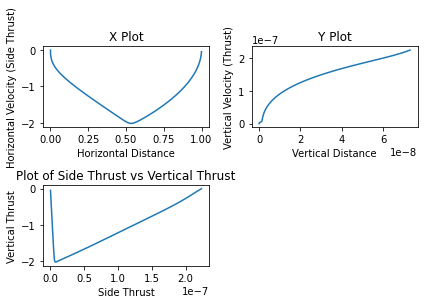


 Itr:	 39
loss: 0.000


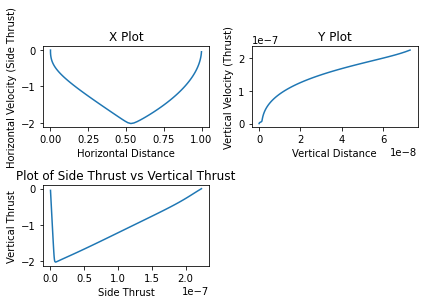


 Itr:	 40
loss: 0.000


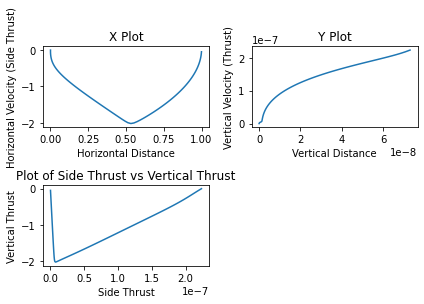

In [230]:
# Now it's time to run the code!

T = 100  # number of time steps
dim_input = 4  # state space dimensions
dim_hidden = 6  # latent dimensions
dim_output = 2  # action space dimensions
d = Dynamics()  # define dynamics
c = Controller(dim_input, dim_hidden, dim_output)  # define controller
s = Simulation(c, d, T)  # define simulation
o = Optimize(s)  # define optimizer
o.train(40)  # solve the optimization problem
# U = t.tensor([BOOST_ACCEL*action[0], action[1]])
# print(s)
# print(type(s))
# print(d)
# print(c)

## Analysis of result

After running the program for 100 time steps with time interval size of 0.01 it is observed that the optimization reaches convergence and it can be observed in the last plot how the rocket reaches its (0,0) position and the change in vertical thrust with drag effect with respect to side thrust which is crosswind thats trying to push the rocket in x direction or horizontal direction. The loss for first iterations is 27.224 and it can be observed that loss reaches 0.000 at 27^th iteration. I can be observed that when horizontal velocity reaches zero there is fall in vertical velocity indicating the landing.

## Different problem setup
Below is the different problem I have been working on which includes drag, crosswind and side thruster inorder to counter act the crosswind but at a 90% power. I observed that for this condition the rocket starts to rock back and forth indicating that its correcting its vertical angle every time there a cross wind. But it did reach (0,0) position and the swinging reduces gradually. 


[1] loss: 262.454


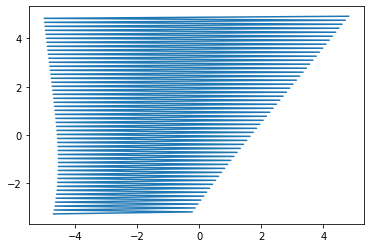

[2] loss: 116.230


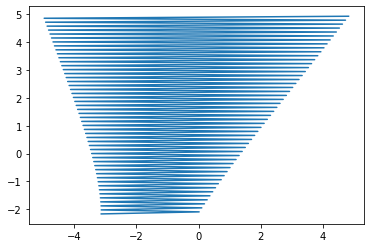

[3] loss: 53.909


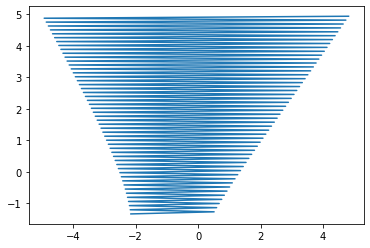

[4] loss: 27.379


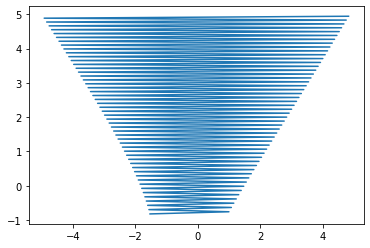

[5] loss: 16.319


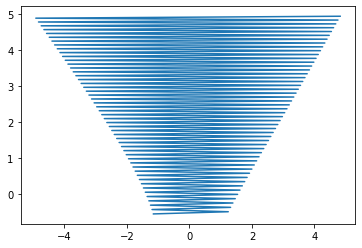

[6] loss: 10.383


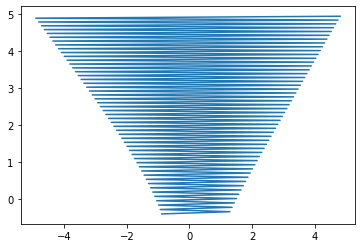

[7] loss: 6.554


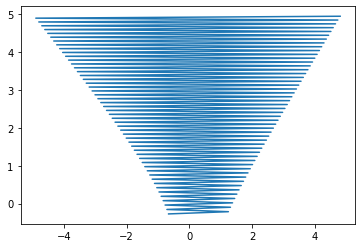

[8] loss: 4.311


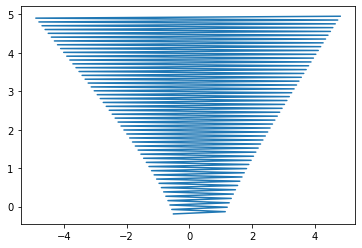

[9] loss: 2.971


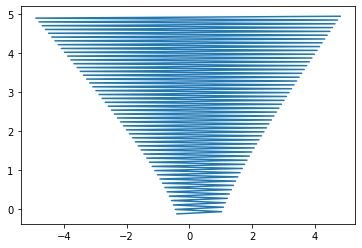

[10] loss: 2.085


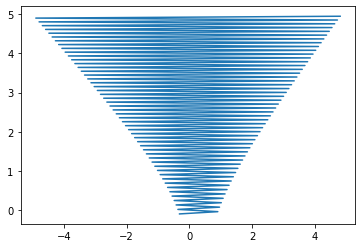

[11] loss: 1.473


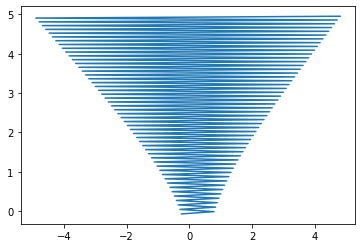

[12] loss: 1.041


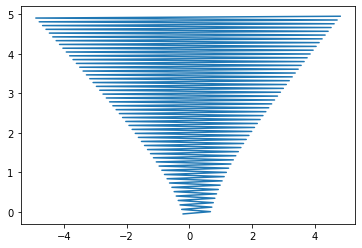

[13] loss: 0.705


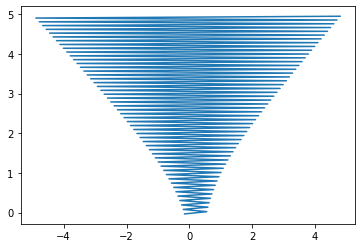

[14] loss: 0.465


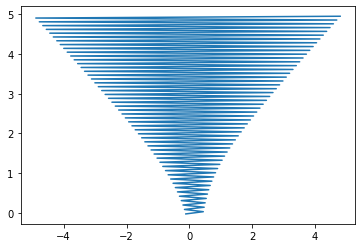

[15] loss: 0.317


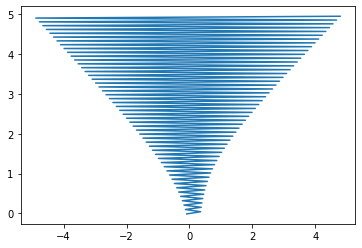

[16] loss: 0.228


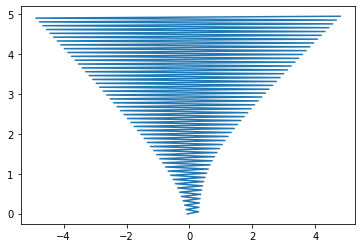

[17] loss: 0.171


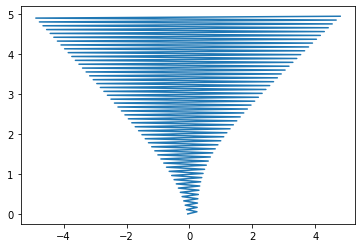

[18] loss: 0.128


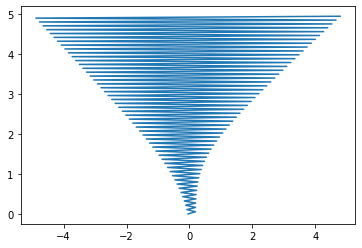

[19] loss: 0.095


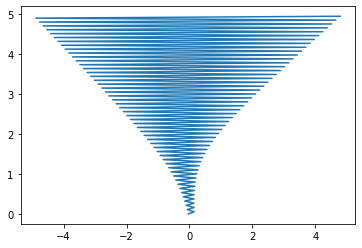

[20] loss: 0.070


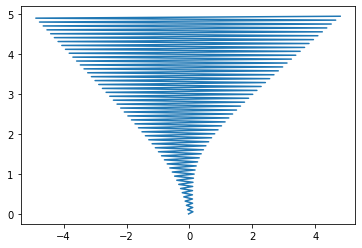

[21] loss: 0.053


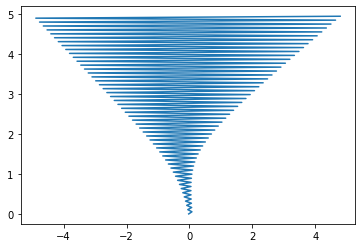

[22] loss: 0.042


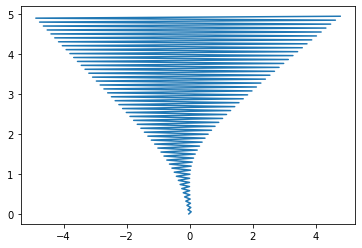

[23] loss: 0.034


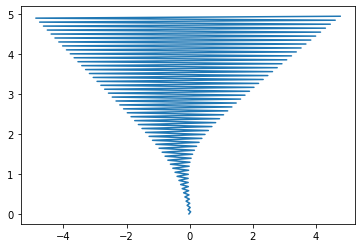

[24] loss: 0.029


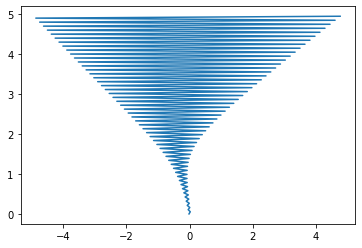

[25] loss: 0.025


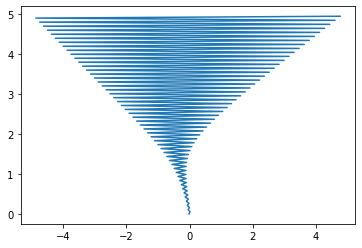

[26] loss: 0.022


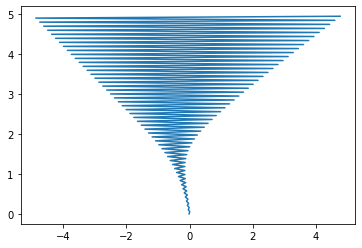

[27] loss: 0.019


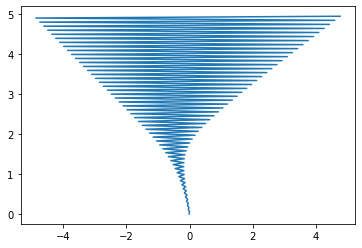

[28] loss: 0.017


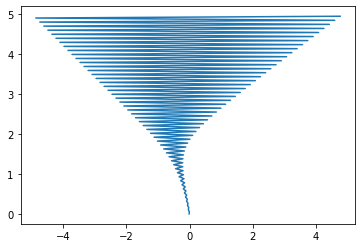

[29] loss: 0.014


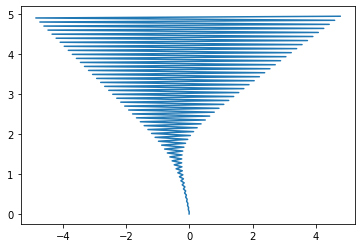

[30] loss: 0.012


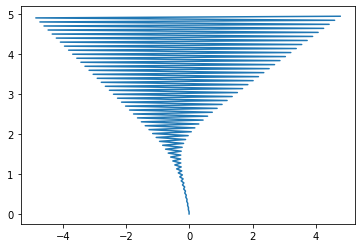

[31] loss: 0.011


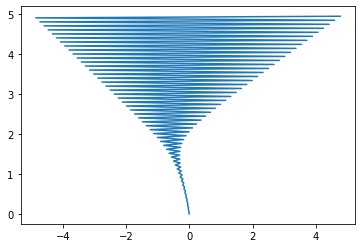

[32] loss: 0.009


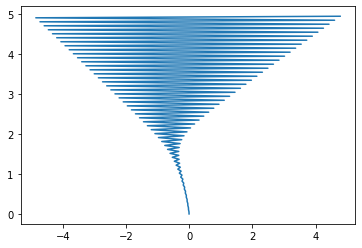

[33] loss: 0.008


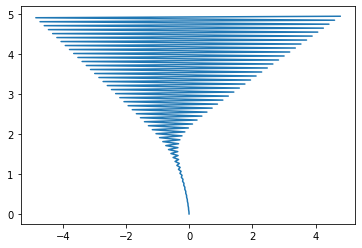

[34] loss: 0.006


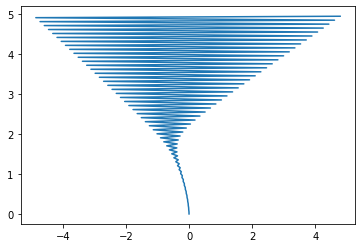

[35] loss: 0.005


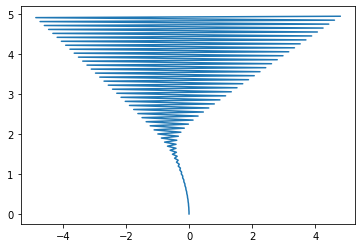

[36] loss: 0.005


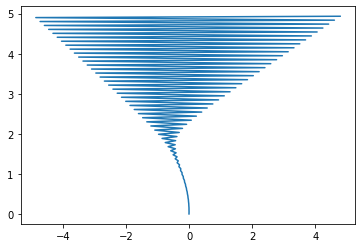

[37] loss: 0.004


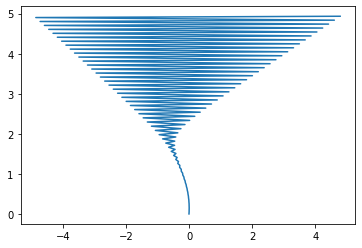

[38] loss: 0.003


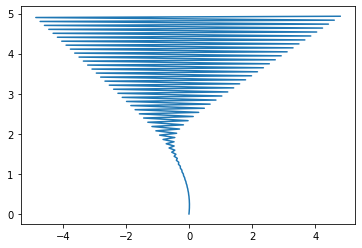

[39] loss: 0.003


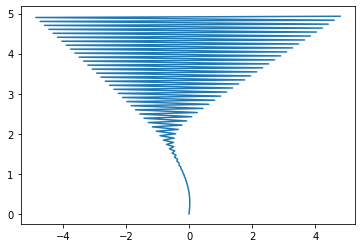

[40] loss: 0.003


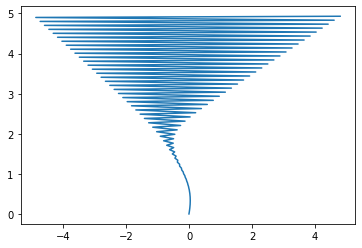

In [234]:
# overhead

import logging
# import math
# import random
import numpy as np
# import time
import torch as t
import torch.nn as nn
from torch import optim
# from torch.nn import utils
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)

# environment parameters

Time_step = 0.01  # time interval
Gra_acc = 5.81  # gravity constant
Thruster_acc = 20.0  # thrust constant converges only for 15

# # the following parameters are not being used in the sample code
# PLATFORM_WIDTH = 0.25  # landing platform width
# PLATFORM_HEIGHT = 0.06  # landing platform height
# ROTATION_ACCEL = 20  # rotation constant

"""Constraint 1: Trying to include drag in y direction (upward) but it's going to e less then the thrust"""
"""Constraint 2: Including the crosswind as a randomness variable"""
"""Constraint 3: This constraint is sort of side counter thrust to crosswind which acts
with 90% the power of crosswind because if its same as cross wind it basically cancels each other"""


class Dynamics(nn.Module):

    def __init__(self):
        super(Dynamics, self).__init__()

    @staticmethod
    def forward(state, action):
        """
        action: there are three of them
        action[0]: take off or landing thrust in y direction range (0, 1)
        action[1]: cross wind velocity in x direction range (-1, 1)
                -1 - cross wind to the left // 0 - no cross wind // 1 - cross wind to the right
        action[2]: counter side thrust to cross wind but at 90% power range (-1, 1)
                -1 - side thrust to the right // 0 - no side thrust // 1 - side thrust to left
        state[0] = x // state[1] = v_x // state[2] = x // state[3] = 0.9*v_x // state[4] = y // state[5] = v_y
        """
        vertical_thrust_y = action[0]
        crosswind = action[1]
        side_c_thrust = action[2]
        # drag = action[3]
        # Apply gravity
        del_state_gravity = -t.tensor([0., 0., 0., 0., 0., Gra_acc * Time_step])
        del_state_y = Thruster_acc * Time_step * t.tensor([0., 0., 0., 0., 0., -1.]) * action[0]
        # del_state_x = Thruster_acc * Time_step * t.tensor([0., 0., 0., 1.]) * action[1]
        # Thrust # Note: Same reason as above. Need a 2-by-1 tensor.
        temp = del_state_y
        d_decel = 0.00658 * temp * temp
        net_acc = Thruster_acc - d_decel
        del_state_vertical = net_acc * Time_step * t.tensor([0., 0., 0., 0., 0., -1.]) * vertical_thrust_y  # 1
        del_state_crosswind = net_acc * Time_step * t.tensor([0., 1., 0., 0., 0., 0.]) * crosswind  # 2
        # del_state_crosswind_l = Thruster_acc * Time_step * t.tensor([0., -1., 0., 0., 0., 0.]) * action[
        #     1] * crosswind  # 3
        del_state_side_thrust = 0.9 * (net_acc * Time_step * t.tensor([0., 0., 0., -1., 0., 0.]) * side_c_thrust)  # 4
        # del_state_side_thrust_r = Thruster_acc * Time_step * t.tensor([0., 0., 0., 1., 0., 0.]) * action[
        #     2] * side_c_thrust  # 5
        # Update velocity
        # state = state + del_state_vertical + del_state_crosswind + del_state_crosswind_l + del_state_side_thrust_r + del_state_side_thrust + del_state_gravity  # drag part goes in here

        state = state + del_state_vertical + del_state_crosswind + del_state_side_thrust + del_state_gravity  # drag part goes in here
        # Update state
        # Note: Same as above. Use operators on matrices/tensors as much as possible.

        step_mat = t.tensor([[0., 0., 0., 0., 1., 0.],
                             [0., 0., 0., 0., Time_step, 1.],
                             [0., 0., 1., 0., 0., 0.],
                             [0., 0., Time_step, 1., 0., 0.],
                             [1., 0., 0., 0., 0., 0.],
                             [Time_step, 1., 0., 0., 0., 0.]])
        state = t.matmul(step_mat, state)

        return state

        # print(type(state))


# a deterministic controller
# Note:
# 0. You only need to change the network architecture in "__init__"
# 1. nn.Sigmoid outputs values from 0 to 1, nn.Tanh from -1 to 1
# 2. You have all the freedom to make the network wider (by increasing "dim_hidden") or
# deeper (by adding more lines to nn.Sequential)
# 3. Always start with something simple

class Controller(nn.Module):

    def __init__(self, dim_input, dim_hidden, dim_output):
        """
        dim_input: # of system states
        dim_output: # of actions
        dim_hidden: up to you
        """
        super(Controller, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(dim_input, dim_hidden),
            nn.Tanh(),
            nn.Linear(dim_hidden, dim_hidden),
            nn.Tanh(),
            nn.Linear(dim_hidden, dim_output),
            # You can add more layers here
            nn.Sigmoid()
        )

    def forward(self, state):
        action = self.network(state)
        return action


# the simulator that rolls out x(1), x(2), ..., x(T)
# Note:
# 0. Need to change "initialize_state" to optimize the controller over a distribution of initial states
# 1. self.action_trajectory and self.state_trajectory stores the action and state trajectories along time


class Simulation(nn.Module):

    def __init__(self, controller, dynamics, T):
        super(Simulation, self).__init__()
        self.state = self.initialize_state()
        self.controller = controller
        self.dynamics = dynamics
        self.T = T
        self.action_trajectory = []
        self.state_trajectory = []

    def forward(self, state):
        self.action_trajectory = []
        self.state_trajectory = []
        for _ in range(T):
            action = self.controller.forward(state)
            state = self.dynamics.forward(state, action)
            self.action_trajectory.append(action)
            self.state_trajectory.append(state)
        return self.error(state)

    @staticmethod
    def initialize_state():
        #  state 0   1   2   3   4   5
        state = [0., -5., 0., 5., 0., 5.]  # need batch of initial states
        return t.tensor(state, requires_grad=False).float()

    @staticmethod
    def error(state):
        return state[0] ** 2 + 10 * state[1] ** 2 + state[2] ** 2 + 4 * state[3] ** 2 + state[4] ** 2 + state[5] ** 2


# set up the optimizer
# Note:
# 0. LBFGS is a good choice if you don't have a large batch size (i.e., a lot of initial
#    states to consider simultaneously)
# 1. You can also try SGD and other momentum-based methods implemented in PyTorch
# 2. You will need to customize "visualize"
# 3. loss.backward is where the gradient is calculated (d_loss/d_variables)
# 4. self.optimizer.step(closure) is where gradient descent is done

class Optimize:
    def __init__(self, simulation):
        self.simulation = simulation
        self.parameters = simulation.controller.parameters()
        self.optimizer = optim.LBFGS(self.parameters, lr=0.01)

    def step(self):
        def closure():
            loss = self.simulation(self.simulation.state)
            self.optimizer.zero_grad()
            loss.backward()
            return loss

        self.optimizer.step(closure)
        return closure()

    def train(self, epochs):
        for epoch in range(epochs):
            loss = self.step()
            print('[%d] loss: %.3f' % (epoch + 1, loss))
            self.visualize()

    def visualize(self):
        data = np.array([self.simulation.state_trajectory[i].detach().numpy() for i in range(self.simulation.T)])
        x = data[:, 1]
        y = data[:, 3]
        plt.plot(x, y)
        plt.show()
        # if o == 40:
        #     data = np.array([self.simulation.state_trajectory[i].detach().numpy() for i in range(self.simulation.T)])
        #     x = data[:, 0]
        #     y = data[:, 1]
        #     plt.plot(x, y)
        #     plt.show()


# Now it's time to run the code!

T = 100  # number of time steps
dim_input = 6  # state space dimensions
dim_hidden = 10  # latent dimensions
dim_output = 3  # action space dimensions
d = Dynamics()  # define dynamics
c = Controller(dim_input, dim_hidden, dim_output)  # define controller
s = Simulation(c, d, T)  # define simulation
o = Optimize(s)  # define optimizer
o.train(40)  # solve the optimization problem


## Initial problem setup

Initially I tried to run Bayesian Optimization in loop such that it's trying to alter the direction of the rocket as it's velocity reduces and the drag is calculated for certain drop in velocity and tried to run the main program with a changing drag parameter but I got struck trying to put everything in working order.

In [235]:
# minimize for drag
import numpy

def black_func(x, y):
     return 1/(x*((1.204*v**2)/2)*y)
v = numpy.linspace(0, -0.16, num=10)
# for i in vel:
#     v = vel.append()
# print(v)
# vel = numpy.array([range(0, -0.16)])
from bayes_opt import BayesianOptimization
import numpy
# import matplotlib as plt
# from matplotlib import gridspec
# X = []
# Y = []
# itr = []
# t = []
bounds = {'x': (0.1, 0.16), 'y': (0.1, 1)}
for v in range(1, len(v)):
        
    optim = BayesianOptimization(f=black_func, pbounds=bounds, random_state=1)
    optim.maximize(init_points=2,n_iter=5)
    print(optim.max)
j = []
for i, res in enumerate(optim.res):
    for j in numpy.linspace(0, -0.16, num=10):
        
        print("velocity = ", j)
    print("Iteration {}: \n\t{}".format(i, res))

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  17.76    |  0.125    |  0.7483   |
|  2        |  44.64    |  0.1      |  0.3721   |
|  3        |  36.1     |  0.1065   |  0.432    |
|  4        |  62.63    |  0.1      |  0.2652   |
|  5        |  22.89    |  0.109    |  0.6659   |
|  6        |  103.8    |  0.16     |  0.1      |
|  7        |  166.1    |  0.1      |  0.1      |
{'target': 166.1129568106312, 'params': {'x': 0.1, 'y': 0.1}}
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  4.439    |  0.125    |  0.7483   |
|  2        |  11.16    |  0.1      |  0.3721   |
|  3        |  9.024    |  0.1065   |  0.432    |
|  4        |  15.66    |  0.1      |  0.2652   |
|  5        |  5.723    |  0.109    |  0.6659   |
|  6        |  25.96    |  0.16     |  0.1      |
|  7        |  41.53    |  0.1      |  0.1      |
{'target': 41.5282392026578, 'params':